### Grip @The Sparks Foundation

### Coder : Deepali Aggarwal(Data Science and Business Analytics Intern)

### Task3 : Exploratory Data Analysis - Retail

(Level - Beginner)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
for feature in data.columns:
        print(feature, len(data[feature].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


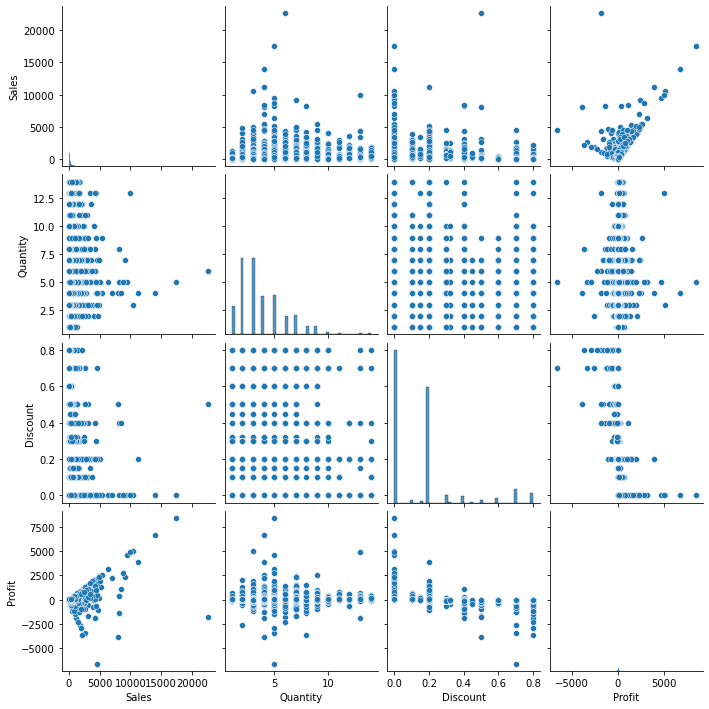

In [7]:
sns.pairplot(data.drop(['Postal Code'], axis = 1))

<AxesSubplot:title={'center':'Correlation Matrix'}>

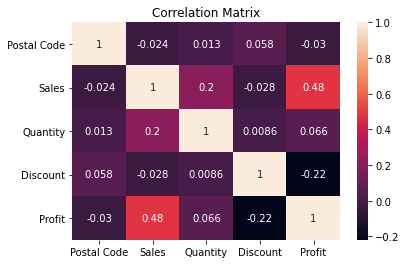

In [8]:
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Philadelphia'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'San Diego'),
  Text(9, 0, 'Springfield')])

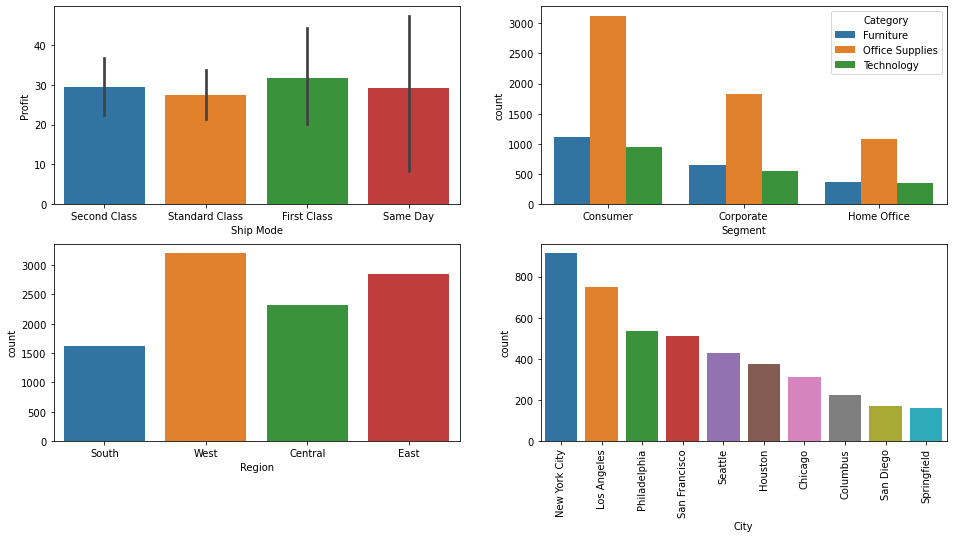

In [9]:
fig, axes = plt.subplots(2, 2, figsize = (16, 8))
sns.barplot(x = data['Ship Mode'],y = data['Profit'], ax = axes[0,0])
sns.countplot(data['Segment'], hue = data['Category'], ax = axes[0,1])
sns.countplot(data['Region'], ax = axes[1,0])
sns.countplot(data['City'], order=data.City.value_counts().iloc[:10].index, ax = axes[1, 1])
plt.xticks(rotation = 90)

* From the above graphs we can see that ship mode is not affecting profit much.
* Mostly customers in every segment shop office supplies much.
* Overall west and east region of United States have the maximum sales
* Talking about cities New york, Los Angeles has high demands of products 

<AxesSubplot:xlabel='Profit', ylabel='Category'>

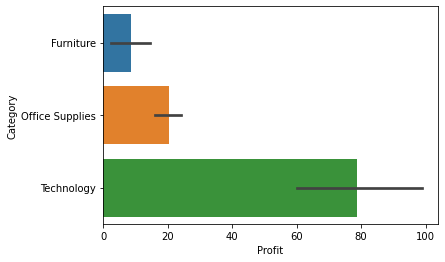

In [10]:
sns.barplot(y = data['Category'], x = data['Profit'])

* There is huge profit in selling technology related items like Phones and accessories.

<AxesSubplot:xlabel='count', ylabel='Sub-Category'>

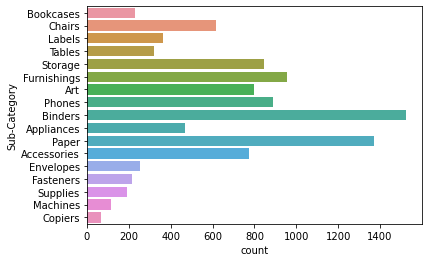

In [11]:
sns.countplot(y = data['Sub-Category'])

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

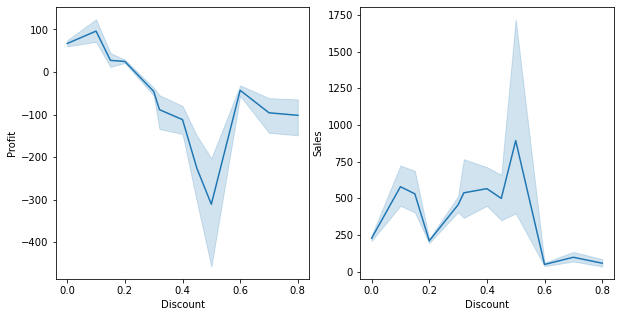

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.lineplot(data['Discount'], data['Profit'], ax = axes[0])
sns.lineplot(data['Discount'], data['Sales'], ax = axes[1])

* Discount and Profit has inverse relation. As discount increase profit decreases. Although sales
are increasing on giving discounts but it is not beneficial for retailers.  

In [13]:
data.groupby('City')['Profit'].agg([('Profit Made', 'sum')]).sort_values(by = 'Profit Made', 
                                                                        ascending = False).reset_index()

,City,Profit Made
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
...,...,...
526,Chicago,-6654.5688
527,Lancaster,-7239.0684
528,San Antonio,-7299.0502
529,Houston,-10153.5485


* These are some of the cities in which good profit is made ~ New York, Los Angeles, Seattle.

Text(0.5, 1.0, 'Category wise demand in each city')

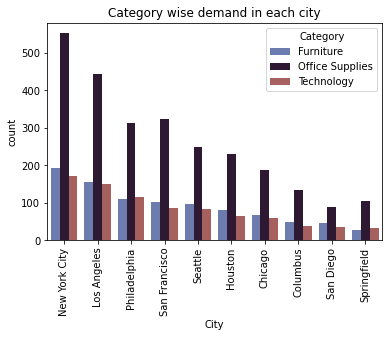

In [14]:
sns.countplot(data['City'],hue= data['Category'] ,  order=data.City.value_counts().iloc[:10].index,
             palette = 'twilight')
plt.xticks(rotation = 90)
plt.title('Category wise demand in each city')

Text(0.5, 1.0, 'Sub categories with high demand in Office supplies')

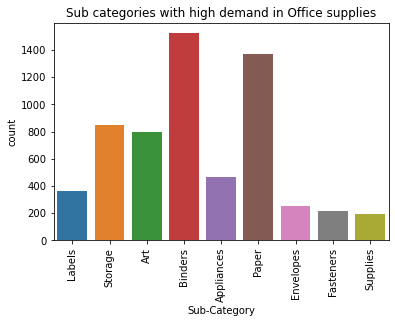

In [15]:
sns.countplot(data[data['Category'] == 'Office Supplies']['Sub-Category'])
plt.xticks(rotation = 90)
plt.title('Sub categories with high demand in Office supplies')

* Office supplies are in high demand in every city of United states. So even if less discount will be 
given on such items it won't affect the sales and retailers can earn more profit.

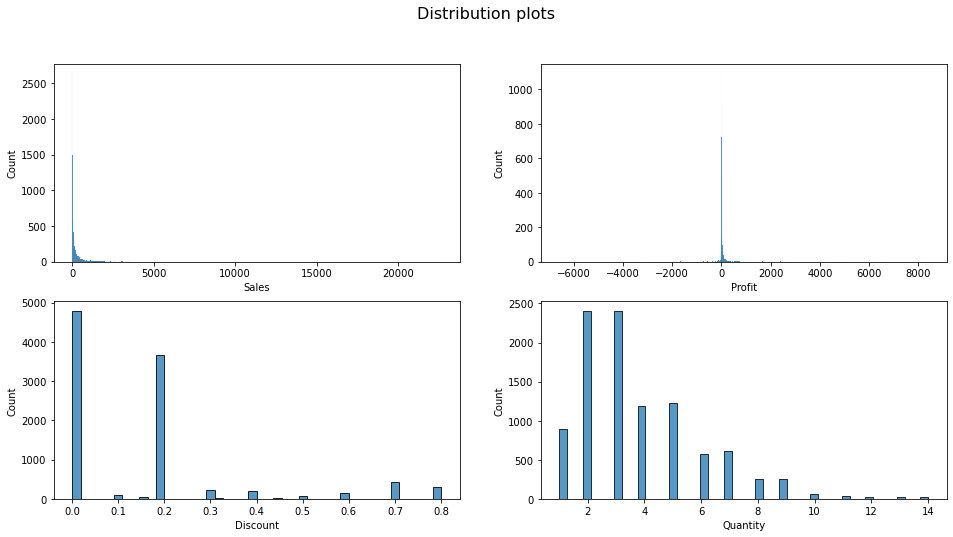

In [16]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.histplot(data['Sales'],ax=axes[0,0])
sns.histplot(data['Profit'],ax=axes[0,1])
sns.histplot(data['Discount'],ax=axes[1,0])
sns.histplot(data['Quantity'],ax=axes[1,1])
plt.show()